In [131]:
file_path = r"\Documents\OEE.xlsx"

# Read the text document
with open(file_path, 'r', encoding='latin-1') as file:
    lines = file.readlines()



In [132]:
import tensorflow as tf

In [133]:
print(tf.__version__)

2.10.1


In [134]:
import tensorflow as tf

# Check if GPU is available
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Verify CUDA support
print("CUDA support:", tf.test.is_built_with_cuda())

# Train your model using TensorFlow
# Ensure that your model and data are configured to utilize the GPU


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CUDA support: True


In [135]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [136]:
# Read the text document as a DataFrame
df = pd.read_excel(file_path)

# Print the DataFrame
df.head()

,Cycle Time (Seconds)\nLook Up / Override,Time\nMinutes\n(Reference),Scheduled\nProduction Time,Planned Downtime,Unplanned Downtime,Total\nQuantity\nProduced,Total Quantity\nDefective,Net Available Time,Net Operating Time,Ideal Operating Time,"Lost ""Quality"" Time",Availability\n(A),Performance\n(P),Quality\n(Q),OEE\n(A * P * Q)
0,80,480.0,480,29.0,70.0,280.0,10.0,451,381,373.333333,13.333333,0.844789,0.979878,0.964286,0.798226
1,80,480.0,480,24.0,39.0,300.0,5.0,456,417,400.000000,6.666667,0.914474,0.959233,0.983333,0.862573
2,80,480.0,480,27.0,23.0,303.0,5.0,453,430,404.000000,6.666667,0.949227,0.939535,0.983498,0.877116
3,80,480.0,480,27.0,57.0,290.0,20.0,453,396,386.666667,26.666667,0.874172,0.976431,0.931034,0.794702
4,80,480.0,480,24.0,23.0,320.0,7.0,456,433,426.666667,9.333333,0.949561,0.985373,0.978125,0.915205


In [137]:
print(df.shape)

(625, 15)


In [138]:
df.columns

Index(['Cycle Time (Seconds)\nLook Up / Override',
       'Time\nMinutes\n(Reference)', 'Scheduled\nProduction Time',
       'Planned Downtime', 'Unplanned Downtime', 'Total\nQuantity\nProduced',
       'Total Quantity\nDefective', 'Net Available Time', 'Net Operating Time',
       'Ideal Operating Time', 'Lost "Quality" Time', 'Availability\n(A)',
       'Performance\n(P)', 'Quality\n(Q)', 'OEE\n(A * P * Q)'],
      dtype='object')

In [139]:
# Assuming df is your DataFrame containing the data

# Define new column names
new_column_names = {
    'Cycle Time (Seconds)\nLook Up / Override': 'Cycle Time',
    'Time\nMinutes\n(Reference)': 'Time',
    'Scheduled\nProduction Time': 'Scheduled Production Time',
    'Planned Downtime': 'Planned Downtime',
    'Unplanned Downtime': 'Unplanned Downtime',
    'Total\nQuantity\nProduced': 'Total Quantity Produced',
    'Total Quantity\nDefective': 'Total Quantity Defective',
    'Net Available Time': 'Net Available Time',
    'Net Operating Time': 'Net Operating Time',
    'Ideal Operating Time': 'Ideal Operating Time',
    'Lost "Quality" Time': 'Lost Quality Time',
    'Availability\n(A)': 'Availability',
    'Performance\n(P)': 'Performance',
    'Quality\n(Q)': 'Quality',
    'OEE\n(A * P * Q)': 'OEE'
}

# Rename columns
df = df.rename(columns=new_column_names)

# Print the updated DataFrame
print(df)


     Cycle Time   Time  Scheduled Production Time  Planned Downtime  \
0            80  480.0                        480              29.0   
1            80  480.0                        480              24.0   
2            80  480.0                        480              27.0   
3            80  480.0                        480              27.0   
4            80  480.0                        480              24.0   
..          ...    ...                        ...               ...   
620          80  480.0                        480              23.0   
621          80  480.0                        480              22.0   
622          80  480.0                        480              22.0   
623          80  480.0                        480              22.0   
624          80  480.0                        480              26.0   

     Unplanned Downtime  Total Quantity Produced  Total Quantity Defective  \
0                  70.0                    280.0                     

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle Time                 625 non-null    int64  
 1   Time                       625 non-null    float64
 2   Scheduled Production Time  625 non-null    int64  
 3   Planned Downtime           624 non-null    float64
 4   Unplanned Downtime         624 non-null    float64
 5   Total Quantity Produced    624 non-null    float64
 6   Total Quantity Defective   624 non-null    float64
 7   Net Available Time         625 non-null    int64  
 8   Net Operating Time         625 non-null    int64  
 9   Ideal Operating Time       625 non-null    float64
 10  Lost Quality Time          625 non-null    float64
 11  Availability               625 non-null    float64
 12  Performance                625 non-null    float64
 13  Quality                    625 non-null    float64

In [141]:
df.head()

,Cycle Time,Time,Scheduled Production Time,Planned Downtime,Unplanned Downtime,Total Quantity Produced,Total Quantity Defective,Net Available Time,Net Operating Time,Ideal Operating Time,Lost Quality Time,Availability,Performance,Quality,OEE
0,80,480.0,480,29.0,70.0,280.0,10.0,451,381,373.333333,13.333333,0.844789,0.979878,0.964286,0.798226
1,80,480.0,480,24.0,39.0,300.0,5.0,456,417,400.000000,6.666667,0.914474,0.959233,0.983333,0.862573
2,80,480.0,480,27.0,23.0,303.0,5.0,453,430,404.000000,6.666667,0.949227,0.939535,0.983498,0.877116
3,80,480.0,480,27.0,57.0,290.0,20.0,453,396,386.666667,26.666667,0.874172,0.976431,0.931034,0.794702
4,80,480.0,480,24.0,23.0,320.0,7.0,456,433,426.666667,9.333333,0.949561,0.985373,0.978125,0.915205


In [142]:
# Drop rows with missing values from the main DataFrame
df.dropna(inplace=True)


# Print the DataFrame with filled missing values
print(df.shape)


(624, 15)


In [143]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your DataFrame with features and target variable
# Separate features (X) and target variable (y)
X = df.drop(columns=['OEE'])
y = df['OEE']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (499, 14)
y_train shape: (499,)
X_test shape: (125, 14)
y_test shape: (125,)


In [144]:
from sklearn.preprocessing import MinMaxScaler


# Initialize MinMaxScaler for X data
scaler_X = MinMaxScaler()

# Fit and transform X_train
X_train = scaler_X.fit_transform(X_train)

# Transform X_test
X_test = scaler_X.transform(X_test)

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10,0.01],
    'svr__gamma': ['scale', 'auto', 0.001, 0.0001]
}

# Create a pipeline with a standard scaler and imputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svr', svr)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', verbose=1)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'svr__C': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}


In [146]:
from sklearn.metrics import mean_absolute_percentage_error

# Create SVR model with the best parameters
best_svr = SVR(C=0.1, gamma='scale', kernel='poly')

# Fit the model to the training data
best_svr.fit(X_train, y_train)

# Evaluate the model on the test data
mape_svr = mean_absolute_percentage_error(y_test, best_svr.predict(X_test))
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_svr)


Mean Absolute Percentage Error (MAPE) on test data: 0.08164543362053651


In [147]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the test data
y_pred = best_svr.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of SVR  on test data:", mse_svr)

# Compute R-squared
r2_svr = r2_score(y_test, y_pred)
print("R-squared of SVR on test data:", r2_svr)

n = len(X_test)  # Number of samples in test data
p = X_test.shape[1]  # Number of predictors (features) used in the SVR model


# Compute Adjusted R-squared
adjusted_r2_svr = 1 - ((1 - r2_svr) * (n - 1) / (n - p - 1))
print("Adjusted R-squared of SVR on test data:", adjusted_r2_svr)


Mean Squared Error of SVR  on test data: 0.0052196022675296515
R-squared of SVR on test data: -5.1916136716599635
Adjusted R-squared of SVR on test data: -5.979637229871232


C:\Users\arifa\AppData\Local\Temp\ipykernel_29344\3117528191.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Plot the identity line


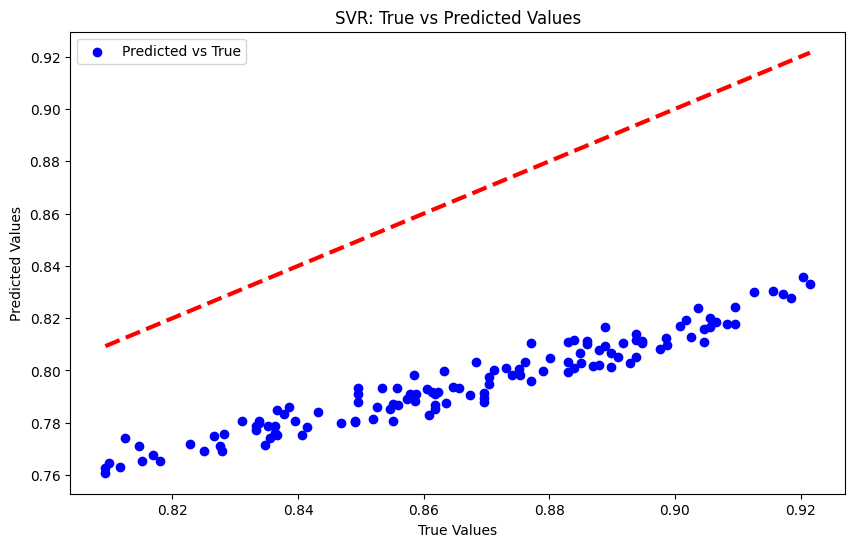

<Figure size 640x480 with 0 Axes>

In [148]:
import matplotlib.pyplot as plt



# Plot the true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Plot the identity line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR: True vs Predicted Values')
plt.legend()
plt.show()
# Save the plot as a PNG file
plt.savefig('SVR_Predicted_vs_True.png')



In [149]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale')

# Create a pipeline with a standard scaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', svr)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)


In [150]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)


Mean Squared Error (MSE): 0.004410557772629148
R-squared: -4.231906265069001
Adjusted R-squared: -4.897785244259601


In [151]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate AIC
def calculate_aic(n, mse, k):
    aic = n * np.log(mse) + 2 * k
    return aic

# Calculate BIC
def calculate_bic(n, mse, k):
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Number of samples in test data
n = len(X_test)

# Number of predictors (features) used in the SVR model
p = X_test.shape[1]

# Compute Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred)

# Compute AIC
aic_svr = calculate_aic(n, mse_svr, p)

# Compute BIC
bic_svr = calculate_bic(n, mse_svr, p)

print("AIC of SVR on test data:", aic_svr)
print("BIC of SVR on test data:", bic_svr)


AIC of SVR on test data: -649.9692648083694
BIC of SVR on test data: -610.3728724861372


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_percentage_error

# Define the Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [5, 3, 4]
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=kfold, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Apply the model with best parameters
best_dtr = DecisionTreeRegressor(**best_params)
best_dtr.fit(X_train, y_train)

# Evaluate the model on the test data
mape_DTR = mean_absolute_percentage_error(y_test, best_dtr.predict(X_test))
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_DTR)


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}
Mean Absolute Percentage Error (MAPE) on test data: 0.005734590635865496


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the test data
y_pred = best_dtr.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_DTR = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of DTR on test data:", mse_DTR)

# Compute R-squared
r2_DTR = r2_score(y_test, y_pred)
print("R-squared of DTR on test data:", r2_DTR)

# Compute Adjusted R-squared
adjusted_r2_DTR = 1 - ((1 - r2_DTR) * (n - 1) / (n - p - 1))
print("Adjusted R-squared of DTR on test data:", adjusted_r2_DTR)


Mean Squared Error of DTR on test data: 6.237861774635448e-05
R-squared of DTR on test data: 0.9260050320576682
Adjusted R-squared of DTR on test data: 0.9165874906831896


In [37]:
import numpy as np

# Calculate AIC
def calculate_aic(n, mse, k):
    aic = n * np.log(mse) + 2 * k
    return aic

# Calculate BIC
def calculate_bic(n, mse, k):
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Number of samples in test data
n = len(X_test)

# Number of predictors (features) used in the DTR model
p = X_test.shape[1]

# Compute Mean Squared Error (MSE)
mse_DTR = mean_squared_error(y_test, y_pred)

# Compute AIC
aic_DTR = calculate_aic(n, mse_DTR, p)

# Compute BIC
bic_DTR = calculate_bic(n, mse_DTR, p)

print("AIC of DTR on test data:", aic_DTR)
print("BIC of DTR on test data:", bic_DTR)


AIC of DTR on test data: -1182.2860007041209
BIC of DTR on test data: -1142.6896083818885


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_percentage_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_regressor, param_grid, cv=kf, scoring='neg_mean_absolute_percentage_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Fit the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test)
mape_RF = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_RF)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Percentage Error (MAPE) on test data: 0.002795447622797495


In [39]:
from sklearn.metrics import mean_squared_error, r2_score


# Compute Mean Squared Error (MSE)
mse_RF = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of RF on test data:", mse_RF)

# Compute R-squared
r2_RF = r2_score(y_test, y_pred)
print("R-squared of RF test data:", r2_RF)

# Compute Adjusted R-squared
adjusted_r2_RF = 1 - ((1 - r2_RF) * (n - 1) / (n - p - 1))
print("Adjusted R-squared of RF on test data:", adjusted_r2_RF)


Mean Squared Error of RF on test data: 1.0297268179738541e-05
R-squared of RF test data: 0.9877851408642687
Adjusted R-squared of RF on test data: 0.986230522428812


In [40]:
import numpy as np

# Calculate AIC
def calculate_aic(n, mse, k):
    aic = n * np.log(mse) + 2 * k
    return aic

# Calculate BIC
def calculate_bic(n, mse, k):
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Number of samples in test data
n = len(X_test)

# Number of predictors (features) used in the DTR model
p = X_test.shape[1]

# Compute Mean Squared Error (MSE)
mse_RF = mean_squared_error(y_test, y_pred)

# Compute AIC
aic_RF = calculate_aic(n, mse_RF, p)

# Compute BIC
bic_RF = calculate_bic(n, mse_RF, p)

print("AIC of RF on test data:", aic_RF)
print("BIC of RF on test data:", bic_RF)


AIC of RF on test data: -1407.4539903969035
BIC of RF on test data: -1367.8575980746712


In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create XGBoost regressor
xgb = XGBRegressor()

# Create KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=kf)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Apply the model with the best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Calculate MAPE
mape_XGB = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_XGB)


Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Percentage Error (MAPE) on test data: 0.0016236031163543816


In [42]:
from sklearn.metrics import mean_squared_error, r2_score


# Compute Mean Squared Error (MSE)
mse_XGB = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of XGB on test data:", mse_XGB)

# Compute R-squared
r2_XGB = r2_score(y_test, y_pred)
print("R-squared of XGB test data:", r2_XGB)

# Compute Adjusted R-squared
adjusted_r2_XGB = 1 - ((1 - r2_XGB) * (n - 1) / (n - p - 1))
print("Adjusted R-squared of XGB on test data:", adjusted_r2_XGB)

Mean Squared Error of XGB on test data: 3.4352763541626764e-06
R-squared of XGB test data: 0.9959249952486455
Adjusted R-squared of XGB on test data: 0.9954063582802913


In [43]:
import numpy as np

# Calculate AIC
def calculate_aic(n, mse, k):
    aic = n * np.log(mse) + 2 * k
    return aic

# Calculate BIC
def calculate_bic(n, mse, k):
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Number of samples in test data
n = len(X_test)

# Number of predictors (features) used in the DTR model
p = X_test.shape[1]

# Compute Mean Squared Error (MSE)
mse_XGB = mean_squared_error(y_test, y_pred)

# Compute AIC
aic_XGB = calculate_aic(n, mse_XGB, p)

# Compute BIC
bic_XGB = calculate_bic(n, mse_XGB, p)

print("AIC of XGB on test data:", aic_XGB)
print("BIC of XGB on test data:", bic_XGB)

AIC of XGB on test data: -1544.6766478846225
BIC of XGB on test data: -1505.0802555623902


In [44]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
}

# Create CatBoost regressor
catboost = CatBoostRegressor(learning_rate=0.03, verbose=False)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Apply the model with the best parameters
best_catboost = CatBoostRegressor(learning_rate=0.03, **best_params, verbose=False)
best_catboost.fit(X_train, y_train)

# Predict on the test data
y_pred = best_catboost.predict(X_test)

# Calculate MAPE
mape_CB = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_CB)


Best parameters found: {'depth': 4, 'iterations': 300}
Mean Absolute Percentage Error (MAPE) on test data: 0.0020640381851056593


In [45]:
from sklearn.metrics import mean_squared_error, r2_score


# Compute Mean Squared Error (MSE)
mse_CB = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of CB on test data:", mse_CB)

# Compute R-squared
r2_CB = r2_score(y_test, y_pred)
print("R-squared of CB test data:", r2_CB)

# Compute Adjusted R-squared
adjusted_r2_CB = 1 - ((1 - r2_CB) * (n - 1) / (n - p - 1))
print("Adjusted R-squared of CB on test data:", adjusted_r2_CB)

Mean Squared Error of CB on test data: 5.420384890005614e-06
R-squared of CB test data: 0.9935702133092793
Adjusted R-squared of CB on test data: 0.9927518768213694


In [46]:
import numpy as np

# Calculate AIC
def calculate_aic(n, mse, k):
    aic = n * np.log(mse) + 2 * k
    return aic

# Calculate BIC
def calculate_bic(n, mse, k):
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Number of samples in test data
n = len(X_test)

# Number of predictors (features) used in the DTR model
p = X_test.shape[1]

# Compute Mean Squared Error (MSE)
mse_CB = mean_squared_error(y_test, y_pred)

# Compute AIC
aic_CB = calculate_aic(n, mse_CB, p)

# Compute BIC
bic_CB = calculate_bic(n, mse_CB, p)

print("AIC of CB on test data:", aic_CB)
print("BIC of CB on test data:", bic_CB)

AIC of CB on test data: -1487.6679665147315
BIC of CB on test data: -1448.0715741924992


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, r2_score

# Define the callback for MAPE calculation
class MAPECallback(Callback):
    def __init__(self, X_val, y_val):
        super(MAPECallback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.mape = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val)
        mape_val = mean_absolute_percentage_error(self.y_val, y_pred)
        self.mape.append(mape_val)
        print(f'\nMAPE on validation data after epoch {epoch + 1}: {mape_val}')

# Create the model with dropout
model = Sequential([
    Dense(100, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
   # Add dropout with a dropout rate of 0.2 (20%)
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
  
    

    Dense(1, activation='linear')
])

# Compile the model with mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Define MAPE callback
mape_callback = MAPECallback(X_test, y_test)

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[mape_callback])



Epoch 1/100
4/4 [==============================] - 0s 3ms/step loss: 1.27

MAPE on validation data after epoch 1: 0.9743306306767786
16/16 [==============================] - 1s 25ms/step - loss: 1.2422 - val_loss: 1.1097
Epoch 2/100
4/4 [==============================] - 0s 2ms/step loss: 1.05

MAPE on validation data after epoch 2: 0.8251017338995349
16/16 [==============================] - 0s 12ms/step - loss: 1.0208 - val_loss: 0.9059
Epoch 3/100
4/4 [==============================] - 0s 2ms/step loss: 0.84

MAPE on validation data after epoch 3: 0.6782909802380326
16/16 [==============================] - 0s 11ms/step - loss: 0.8323 - val_loss: 0.7375
Epoch 4/100
4/4 [==============================] - 0s 1ms/step loss: 0.68

MAPE on validation data after epoch 4: 0.5495163734391224
16/16 [==============================] - 0s 11ms/step - loss: 0.6854 - val_loss: 0.6156
Epoch 5/100
4/4 [==============================] - 0s 3ms/step loss: 0.58

MAPE on validation data after epoch 5: 0.

In [98]:
# Generate predictions for the test data
y_pred = model.predict(X_test)

# Calculate MSE, R-squared, and Adjusted R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print results
print("MSE:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


4/4 [==============================] - 0s 2ms/step
MSE: 0.00014676558573102315
R-squared: 0.8259032469208684
Adjusted R-squared: 0.8037454783471607


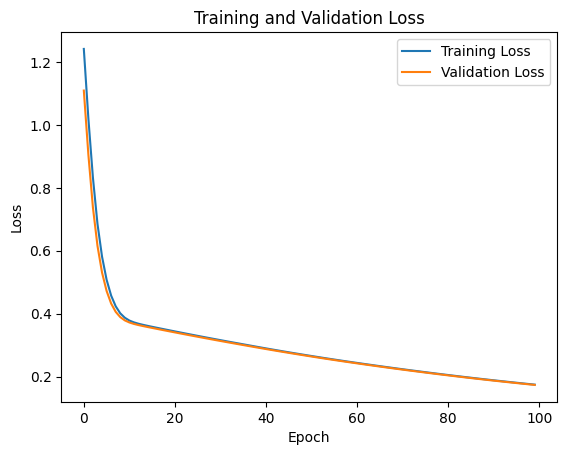

In [99]:


# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [100]:
import numpy as np

# Calculate the log-likelihood
def log_likelihood(y_true, y_pred, sigma_sq):
    n = len(y_true)
    return -0.5 * n * (np.log(2 * np.pi * sigma_sq) + 1 - (np.sum(np.square(y_true - y_pred)) / sigma_sq))

# Generate predictions for the test data
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred.flatten()

# Compute the variance of the residuals (sigma^2)
sigma_sq = np.var(residuals)

# Compute the log-likelihood
ll = log_likelihood(y_test, y_pred.flatten(), sigma_sq)

# Calculate the number of parameters in the model
n_params = sum([np.prod(w.shape) for w in model.get_weights()])

# Compute AIC
AIC = 2 * n_params - 2 * ll

# Print AIC
print("AIC:", AIC)


# Calculate BIC
BIC = -2 * ll + n_params * np.log(len(y_test))

# Print BIC
print("BIC:", BIC)









4/4 [==============================] - 0s 2ms/step
AIC: -10111.792768887264
BIC: -1250.6858299191535


In [101]:
# Save model architecture to JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to HDF5 file
model.save_weights("model_weights_OEE.h5")

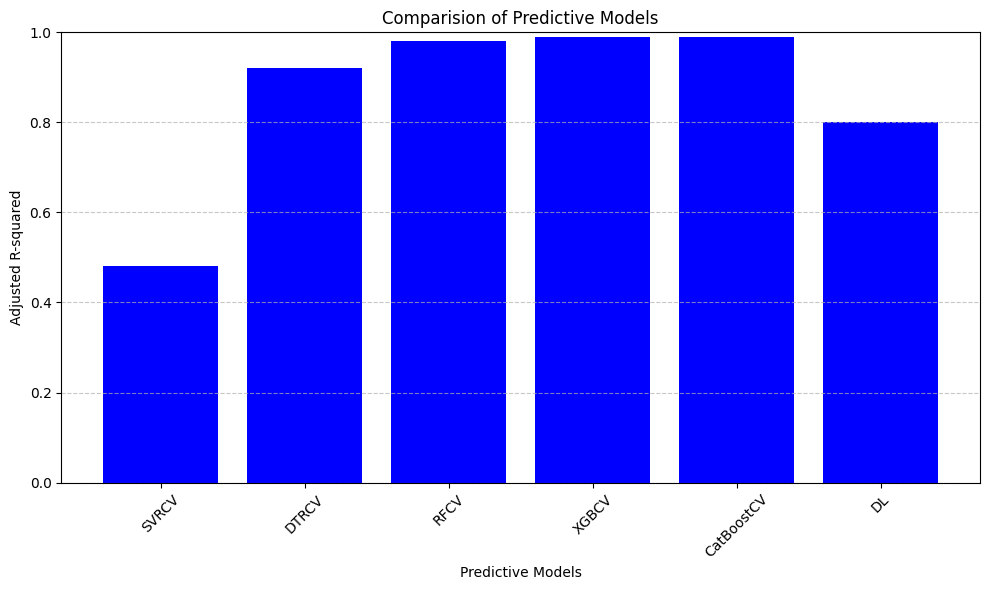

In [130]:
import matplotlib.pyplot as plt

# Data for adjusted R-squared metrics
models = ['SVRCV', 'DTRCV', 'RFCV', 'XGBCV', 'CatBoostCV', 'DL']
adjusted_r_squared = [0.48, 0.92, 0.98, 0.99, 0.99, 0.80]

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, adjusted_r_squared, color='blue')
plt.title('Comparision of Predictive Models')
plt.xlabel('Predictive Models')
plt.ylabel('Adjusted R-squared')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [107]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, r2_score

# Define the callback for MAPE calculation
class MAPECallback(Callback):
    def __init__(self, X_val, y_val):
        super(MAPECallback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.mape = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val)
        mape_val = mean_absolute_percentage_error(self.y_val, y_pred)
        self.mape.append(mape_val)
        print(f'\nMAPE on validation data after epoch {epoch + 1}: {mape_val}')

# Create the model with dropout
model = Sequential([
    Dense(100, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
   # Add dropout with a dropout rate of 0.2 (20%)
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
  


    Dense(1, activation='linear')
])

# Compile the model with mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Define MAPE callback
mape_callback = MAPECallback(X_test, y_test)

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[mape_callback])



Epoch 1/100
4/4 [==============================] - 0s 2ms/step loss: 0.86

MAPE on validation data after epoch 1: 0.6775745551996496
16/16 [==============================] - 1s 25ms/step - loss: 0.8617 - val_loss: 0.7463
Epoch 2/100
4/4 [==============================] - 0s 1ms/step loss: 0.70

MAPE on validation data after epoch 2: 0.49800956418795433
16/16 [==============================] - 0s 10ms/step - loss: 0.6670 - val_loss: 0.5841
Epoch 3/100
4/4 [==============================] - 0s 2ms/step loss: 0.54

MAPE on validation data after epoch 3: 0.3360731387191966
16/16 [==============================] - 0s 11ms/step - loss: 0.5326 - val_loss: 0.4787
Epoch 4/100
4/4 [==============================] - 0s 2ms/step loss: 0.47

MAPE on validation data after epoch 4: 0.20562381409806696
16/16 [==============================] - 0s 12ms/step - loss: 0.4513 - val_loss: 0.4222
Epoch 5/100
4/4 [==============================] - 0s 3ms/step loss: 0.41

MAPE on validation data after epoch 5: 

In [108]:
# Generate predictions for the test data
y_pred = model.predict(X_test)

# Calculate MSE, R-squared, and Adjusted R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print results
print("MSE:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


4/4 [==============================] - 0s 2ms/step
MSE: 0.00020893090789059785
R-squared: 0.7521612951670353
Adjusted R-squared: 0.7206181872792035


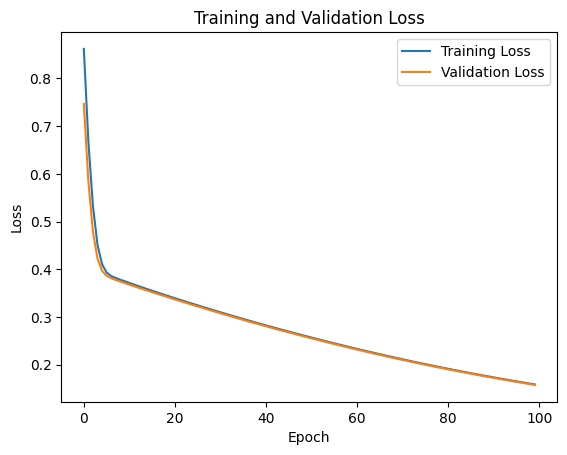

In [109]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [110]:
import numpy as np

# Calculate the log-likelihood
def log_likelihood(y_true, y_pred, sigma_sq):
    n = len(y_true)
    return -0.5 * n * (np.log(2 * np.pi * sigma_sq) + 1 - (np.sum(np.square(y_true - y_pred)) / sigma_sq))

# Generate predictions for the test data
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred.flatten()

# Compute the variance of the residuals (sigma^2)
sigma_sq = np.var(residuals)

# Compute the log-likelihood
ll = log_likelihood(y_test, y_pred.flatten(), sigma_sq)

# Calculate the number of parameters in the model
n_params = sum([np.prod(w.shape) for w in model.get_weights()])

# Compute AIC
AIC = 2 * n_params - 2 * ll

# Print AIC
print("AIC:", AIC)


# Calculate BIC
BIC = -2 * ll + n_params * np.log(len(y_test))

# Print BIC
print("BIC:", BIC)


4/4 [==============================] - 0s 2ms/step
AIC: -10184.509208734351
BIC: -1323.4022697662404
